## An introduction to explainable AI with Shapley values
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

## <font color='blue'> Shap for feature visualization </font>
可解釋 AI (XAI) 系列 — SHAP: https://medium.com/ai-academy-taiwan/%E5%8F%AF%E8%A7%A3%E9%87%8B-ai-xai-%E7%B3%BB%E5%88%97-shap-2c600b4bdc9e

An introduction to explainable AI with Shapley values
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

Unboxing the Black Box: A Guide to Explainability Techniques for Machine Learning Models Using SHAP
https://medium.com/the-power-of-ai/machine-learning-explainability-with-shap-ee60fbfa21e

### SHAP (SHapley Additive exPlanations) is an additive feature attribution method
- The core idea behind Shapley value based explanations of machine learning models is to use fair allocation results from cooperative game theory to allocate credit for a model’s output among its input features. 
- In order to connect game theory with machine learning models, it is necessary to both match a model’s input features with players in a game, and also match the model function with the rules of the game. 
- Since in game theory a player can join or not join a game, we need a way for a feature to “join” or “not join” a model. 
- The most common way to define what it means for a feature to “join” a model is to say that feature has “joined a model” when we know the value of that feature, and it has not joined a model when we don’t know the value of that feature. 

\begin{equation}
\begin{split}
\text{Shapley Values} \ \phi_j(\mathbb{S}) = \sum_{\mathbb{S} \subseteq \mathbb{S_0} \setminus \{ x_j \}}\frac{|\mathbb{S}|!(p-|\mathbb{S}|-1)!}{p!}(J(\mathbb{S} \cup {x_j}) - J(\mathbb{S}))
\end{split}. \tag{1}
\end{equation} 

where <br>

$x_i$: feature $i$, $i=1,...,p$ <br>
$\mathbb{S_0}$: whole feature set with ${x_1, x_2,..., x_p}$ <br>
$\mathbb{S}$: subset of $\mathbb{S_0}$ excludes $x_j$ <br>
${J}(\mathbb{S})$: the prediction value of $\mathbb{S}$ minmus expection value

\begin{equation}
\begin{split}
J(\mathbb{S}) = \int \hat{f}(x_1, ...,x_p) d\mathbb{P}_{x \notin \mathbb{S}} - \mathbb{E_X} (\hat{f}(\mathbb{X}))
\end{split}. \tag{2}
\end{equation} 
where <br>
$\hat{f}(x)$:the prediction valaue of $x$

In [1]:
import sklearn
import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

c:\Users\hao\anaconda3\envs\Python11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


LinearRegression()

In [2]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


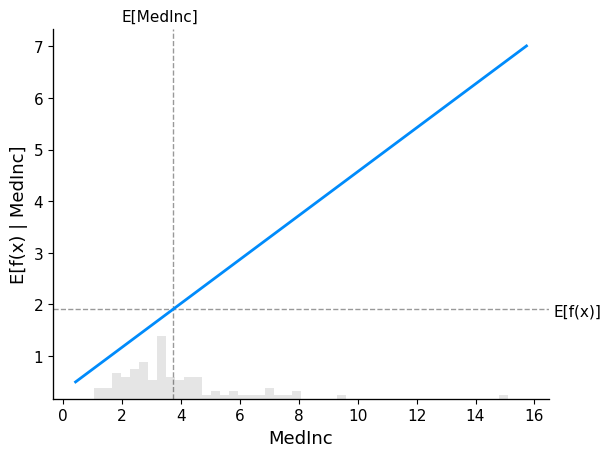

In [3]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

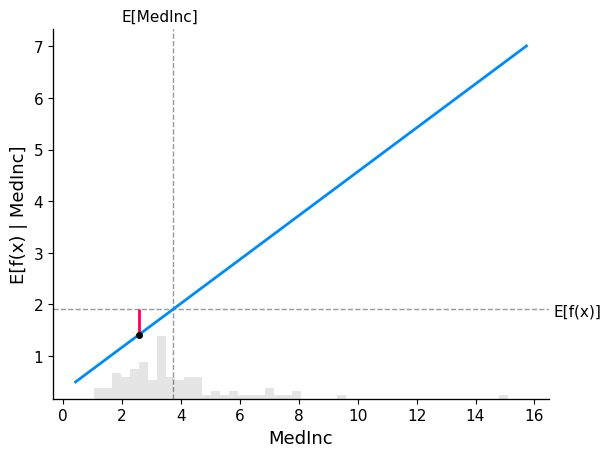

In [4]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

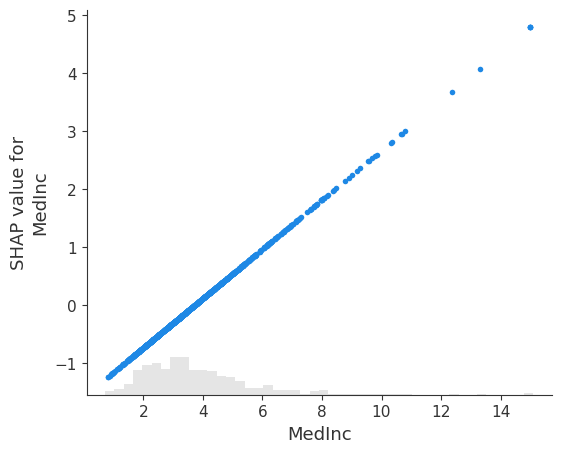

In [5]:
shap.plots.scatter(shap_values[:, "MedInc"])

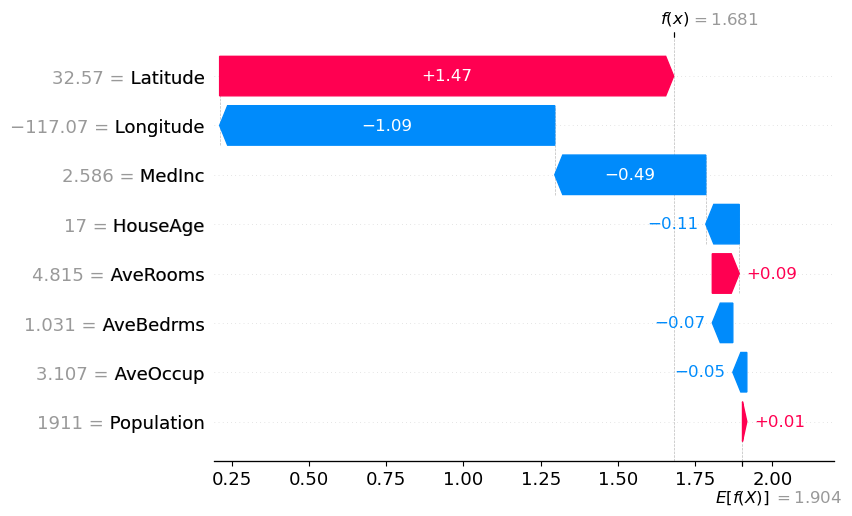

In [6]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

<div>
<img src="attachment:image.png" width="800"/>
</div>

https://miro.medium.com/v2/resize:fit:828/1*O2rvT954PIszI92qDOz1Hg.gif

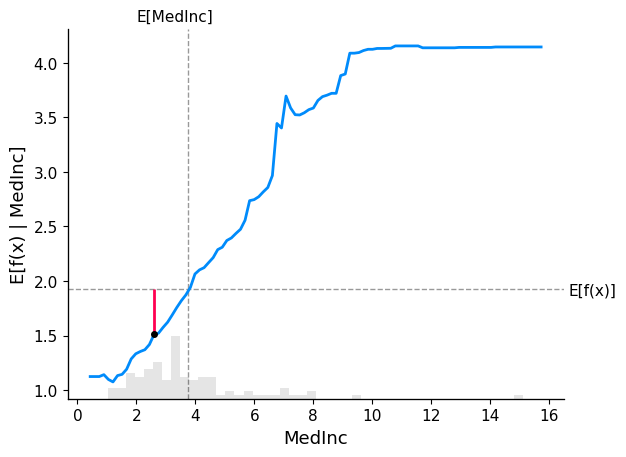

In [7]:
# fit a GAM model to the data
# yinstall interpret
import interpret.glassbox

model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_ebm.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_ebm[sample_ind : sample_ind + 1, :],
)

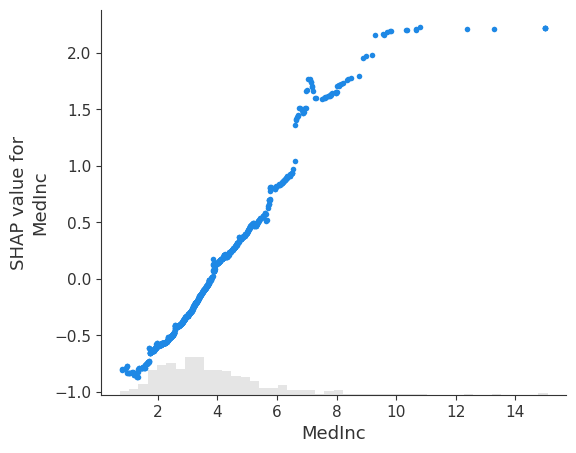

In [8]:
shap.plots.scatter(shap_values_ebm[:, "MedInc"])

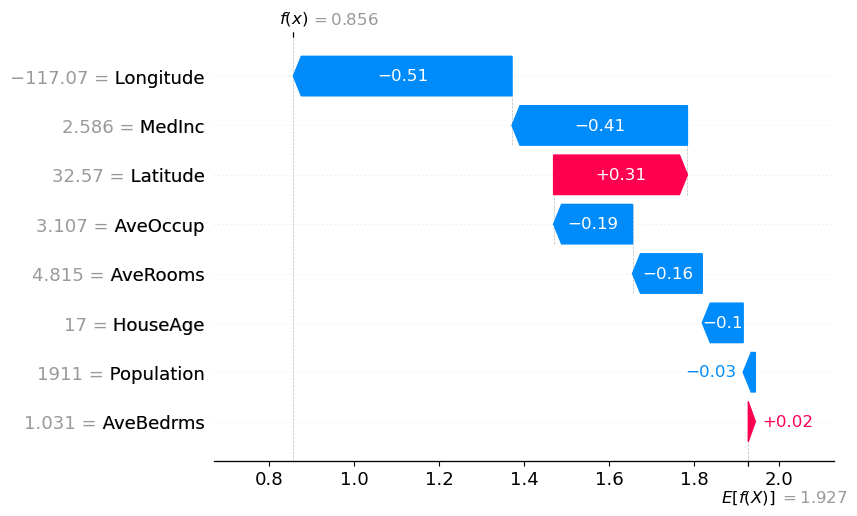

In [9]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind])

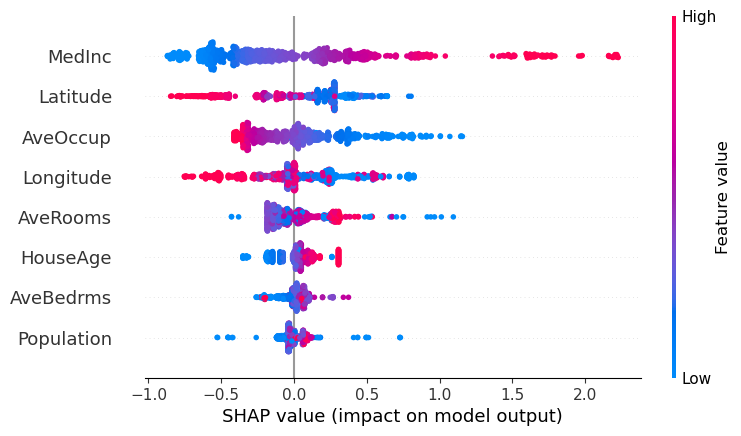

In [10]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values_ebm)

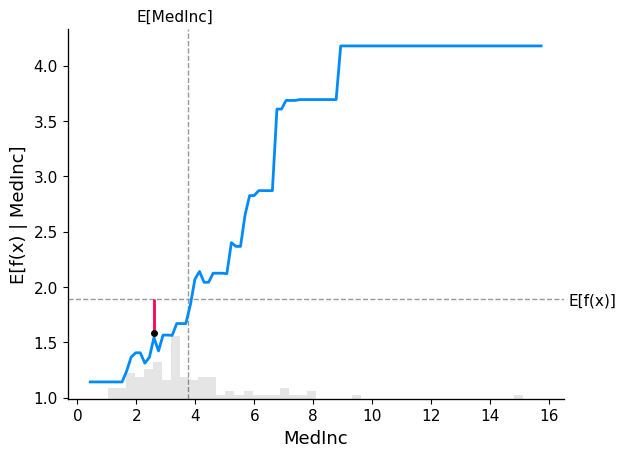

In [12]:
# train XGBoost model
# conda install xgboost
import xgboost

model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_xgb.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)

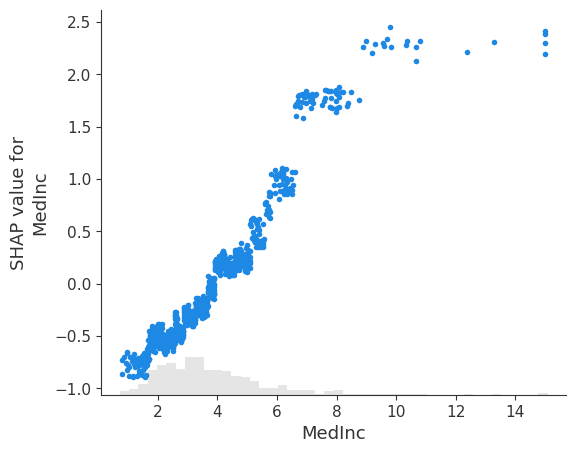

In [13]:
shap.plots.scatter(shap_values_xgb[:, "MedInc"])

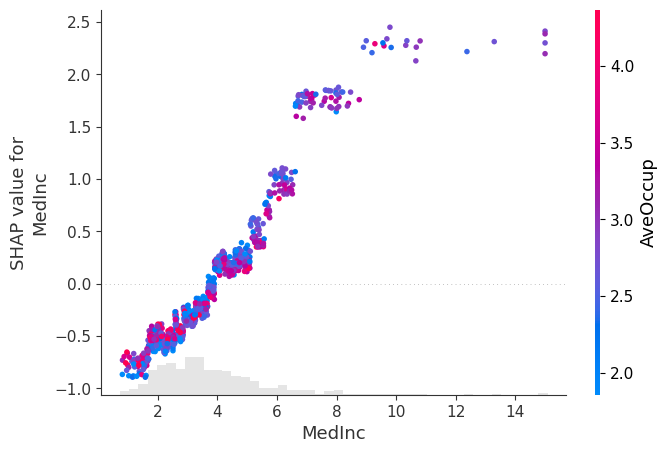

In [14]:
shap.plots.scatter(shap_values_xgb[:, "MedInc"], color=shap_values)

In [15]:
# a classic adult census dataset price dataset
X_adult, y_adult = shap.datasets.adult()

# a simple linear logistic model
model_adult = sklearn.linear_model.LogisticRegression(max_iter=10000)
model_adult.fit(X_adult, y_adult)


def model_adult_proba(x):
    return model_adult.predict_proba(x)[:, 1]


def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:, 1] - p[:, 0]

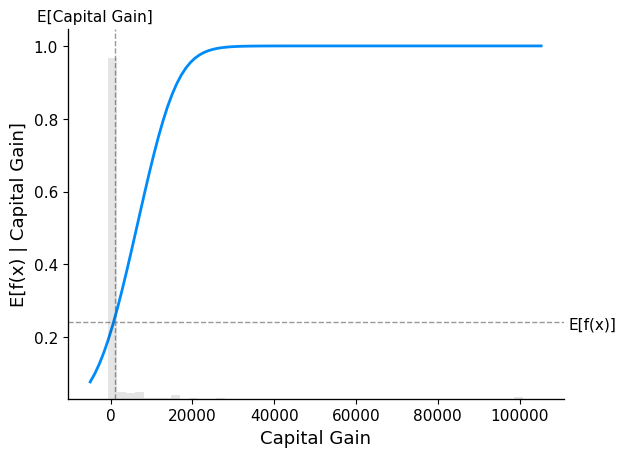

In [16]:
# make a standard partial dependence plot
sample_ind = 18
fig, ax = shap.partial_dependence_plot(
    "Capital Gain",
    model_adult_proba,
    X_adult,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
)

In [18]:
import shap
import pandas as pd
X, y = pd.DataFrame(cancer.data, columns = cancer.feature_names), cancer.target
model = GradientBoostingClassifier().fit(X, y)
explainer = shap.Explainer(model, X)

shap_values = explainer(X)
shap.waterfall_plot(shap_values[0])

# force plot
shap.force_plot(explainer.expected_value, shap_values.values[0,:], X.iloc[0,:])

# point color: Feature value higher with red, lower with blue
# X axis: range of shape value
shap.summary_plot(shap_values, X)

NameError: name 'cancer' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X, y = pd.DataFrame(cancer.data, columns = cancer.feature_names), cancer.target
model = RandomForestRegressor().fit(X, y) # RANDOM FOREST REGRESSOR
explainer = shap.Explainer(model, X)

shap_values = explainer(X)
shap.waterfall_plot(shap_values[0])
# force plot
shap.force_plot(explainer.expected_value, shap_values.values[0,:], X.iloc[0,:])

shap.summary_plot(shap_values, X)